In [69]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#load images
img = cv.imread('empire.jpg')
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_another = cv.imread('fisherman.jpg')
#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [70]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()
#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [71]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

In [72]:
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

True

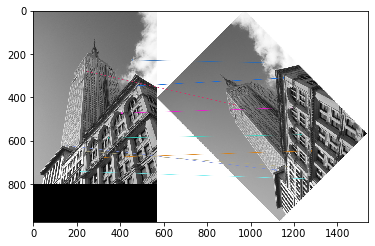

In [73]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,
 matches_des_des_45[:nBestMatches],
 None,
flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_45)
cv.imwrite('matching_des_des_45.jpg',matching_des_des_45)

In [74]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print("match ", i, " info")
    print("\tdistance:", matches_des_des_45[i].distance)
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:",
        kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",
        kp_train[matches_des_des_45[i].trainIdx].pt[1])
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:",
        kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",
        kp_query[matches_des_des_45[i].queryIdx].pt[1])

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125  y: 773.8291015625
	keypoint in query: ID: 661  x: 215.936279296875  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625  y: 587.2408447265625
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.3556823730469  y: 240.71566772460938
	keypoint in query: ID: 2328  x: 458.29034423828125  y: 229.1186065673828
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430419921875
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.510498046875  y: 733.6980590820312
	keypoint in query: ID: 101  x: 153.5779266357422  y: 621.6637573242188
match  5  info
	distance: 13.0
	keypoint in train: ID: 1753  x: 

True

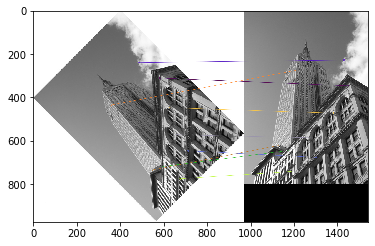

In [75]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,
 matches_des_45_des[:nBestMatches],
 None,
flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_45_des)
cv.imwrite('matching_des_45_des.jpg',matching_des_45_des)

## Section 2

### Empire vs Empire45

In [76]:
train = des_45
query = des
emp_vs_emp45_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

126.06704616546631


In [77]:
train = des
query = des_45
emp45_vs_emp_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

140.96671104431152


In [78]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

133.51687860488892


----

In [79]:
train = des_45
query = des
emp_vs_emp45_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

205.21642875671387


In [80]:
train = des
query = des_45
emp45_vs_emp_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

222.00928497314453


In [81]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

213.6128568649292


----

In [82]:
train = des_45
query = des
emp_vs_emp45_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

489.5867977142334


In [83]:
train = des
query = des_45
emp45_vs_emp_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

509.48654556274414


In [84]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

499.53667163848877


### Empire vs Empire Zoomed

In [85]:
train = des_zoomedout
query = des
emp_vs_emp45_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

114.90154361724854


In [86]:
train = des
query = des_zoomedout
emp45_vs_emp_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

128.57633781433105


In [87]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

121.7389407157898


----

In [88]:
train = des_zoomedout
query = des
emp_vs_emp45_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

185.21389770507812


In [89]:
train = des
query = des_zoomedout
emp45_vs_emp_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

199.60139274597168


In [90]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

192.4076452255249


----

In [91]:
train = des_zoomedout
query = des
emp_vs_emp45_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

437.12614154815674


In [92]:
train = des
query = des_zoomedout
emp45_vs_emp_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

455.3195466995239


In [93]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

446.22284412384033


### Empire vs Fisherman

In [94]:
train = des_another
query = des
emp_vs_emp45_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

931.2929534912109


In [95]:
train = des
query = des_another
emp45_vs_emp_count = 0
nBestMatches = 10

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

1023.8024139404297


In [96]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

977.5476837158203


----

In [97]:
train = des_another
query = des
emp_vs_emp45_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

1637.9727249145508


In [98]:
train = des
query = des_another
emp45_vs_emp_count = 0
nBestMatches = 15

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

1737.0888214111328


In [99]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

1687.5307731628418


----

In [100]:
train = des_another
query = des
emp_vs_emp45_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp_vs_emp45_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp_vs_emp45_count)

4040.236213684082


In [101]:
train = des
query = des_another
emp45_vs_emp_count = 0
nBestMatches = 30

matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

for i in range (0, nBestMatches):
    emp45_vs_emp_count = emp_vs_emp45_count + matches_des_des_45[i].distance

print(emp45_vs_emp_count)

4176.07804107666


In [102]:
print((emp_vs_emp45_count+emp45_vs_emp_count)*0.5)

4108.157127380371
